In [2]:
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn import tree
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [3]:
def get_datasets():
    # My python only likes absolute paths 
    brca = pd.read_csv('C:\\Users\\sohai\\PycharmProjects\\comp3212-cancer-exploration\\data\\Gistic2_CopyNumber_BRCA', sep='\t')
    ovca = pd.read_csv('C:\\Users\sohai\\PycharmProjects\\comp3212-cancer-exploration\\data\\Gistic2_CopyNumber_OVCA', sep='\t')
    brca.set_index('Gene Symbol', inplace=True)
    ovca.set_index('Gene Symbol', inplace=True)
    brca = brca.transpose()
    ovca = ovca.transpose()
    brca['BRCA'] = 1
    ovca['BRCA'] = 0
    df = pd.concat([brca, ovca[1:]])
    print(len(df), len(brca.transpose()-2) + len(ovca.transpose()-2))
    return df
df = get_datasets()

1658 49554


In [4]:
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [5]:
y = df["BRCA"]
X = df[df.columns[:-1]]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [ ]:
# Hyper parameter tuning 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


param_dist = {"max_depth": [3,None],
             "min_samples_leaf": randint(1,9),
             "criterion": ["gini","entropy"],
             }

t = tree.DecisionTreeClassifier()
# Cross validation is at 5 now
tree_cv = RandomizedSearchCV(t,param_dist,cv=5)
tree_cv.fit(X_train,y_train)

print("Tuned Decision tree params: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

0.8868613138686131


[Text(167.4, 190.26, 'X[20721] <= -0.316\nentropy = 0.934\nsamples = 1110\nvalue = [388, 722]'),
 Text(83.7, 135.9, 'X[19345] <= -0.486\nentropy = 0.847\nsamples = 420\nvalue = [305, 115]'),
 Text(41.85, 81.53999999999999, 'X[4628] <= -0.576\nentropy = 0.352\nsamples = 226\nvalue = [211, 15]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.811\nsamples = 44\nvalue = [33, 11]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.152\nsamples = 182\nvalue = [178, 4]'),
 Text(125.55000000000001, 81.53999999999999, 'X[5212] <= 0.68\nentropy = 0.999\nsamples = 194\nvalue = [94, 100]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.851\nsamples = 123\nvalue = [34, 89]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.622\nsamples = 71\nvalue = [60, 11]'),
 Text(251.10000000000002, 135.9, 'X[5215] <= 0.866\nentropy = 0.53\nsamples = 690\nvalue = [83, 607]'),
 Text(209.25, 81.53999999999999, 'X[22083] <= -0.424\nentropy = 0.316\nsamples = 613\nvalue = [35, 578]'),
 Text(188.3250000

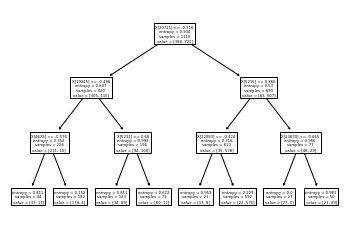

In [6]:
# Making the decision tree no PCA
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 2)
X_train = pd.DataFrame(X_train, columns=df.columns[ :len(df.columns)-1])

clf = clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
tree.plot_tree(clf)

In [13]:
# Important features 
features = list(X_train.columns)
fi_model = pd.DataFrame({'feature': features,
                   'importance': clf.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
20721,PIAS4,0.508385
5215,ACTRT3,0.159307
19345,RHBDL3,0.132758
5212,EGFEM1P,0.072801
22083,U2AF2,0.061061
23651,FAM19A5,0.039577
4628,PXK,0.026111
16515,DACT1,0.000000
16523,LRRC9,0.000000
16522,MIR5586,0.000000


at 0.9999 % of the variance ======
original shape:    (1658, 24776)
transformed shape: (1658, 997)
0.9614457831325302


[Text(167.4, 190.26, 'X[0] <= 7.162\nentropy = 0.936\nsamples = 1243\nvalue = [438, 805]'),
 Text(83.7, 135.9, 'X[0] <= -5.834\nentropy = 0.306\nsamples = 806\nvalue = [44, 762]'),
 Text(41.85, 81.53999999999999, 'X[10] <= 10.271\nentropy = 0.117\nsamples = 569\nvalue = [9, 560]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.036\nsamples = 529\nvalue = [2, 527]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.669\nsamples = 40\nvalue = [7, 33]'),
 Text(125.55000000000001, 81.53999999999999, 'X[7] <= 5.209\nentropy = 0.604\nsamples = 237\nvalue = [35, 202]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.39\nsamples = 209\nvalue = [16, 193]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.906\nsamples = 28\nvalue = [19, 9]'),
 Text(251.10000000000002, 135.9, 'X[7] <= -9.536\nentropy = 0.464\nsamples = 437\nvalue = [394, 43]'),
 Text(209.25, 81.53999999999999, 'X[4] <= -0.915\nentropy = 0.987\nsamples = 76\nvalue = [43, 33]'),
 Text(188.32500000000002, 27.180000000000

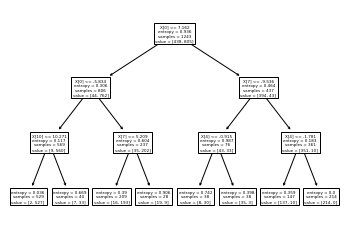

In [8]:
# PCA and train now
x = 0.9999
pca = PCA(n_components=0.99)
pca.fit(X_train)
X_pca = pca.transform(X)
pca = PCA(n_components=x)
pca.fit(X_train)
X_pca = pca.transform(X)
print('at', x, '% of the variance ======')
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
y_red = pd.Series(y)

df_redd = pd.DataFrame(X_pca)
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 2)
X_traind, X_testd, y_traind, y_testd = train_test_split(df_redd, y)

clf.fit(X_traind,y_traind)
print(clf.score(X_testd,y_testd))
tree.plot_tree(clf)

In [9]:
from sklearn.metrics import confusion_matrix
import itertools

# Making the new split given the PCA
X_train, X_test, y_train, y_test = train_test_split(df_redd, y)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

In [10]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

In [17]:
train_rf_predictions = clf.predict(X_train)
train_rf_probs = clf.predict_proba(X_train)[:, 1]

rf_predictions = clf.predict(X_test)
rf_probs = clf.predict_proba(X_test)[:, 1]

Recall Baseline: 1.0 Test: 0.98 Train: 0.97
Precision Baseline: 0.64 Test: 0.97 Train: 0.96
Roc Baseline: 0.5 Test: 0.98 Train: 0.98


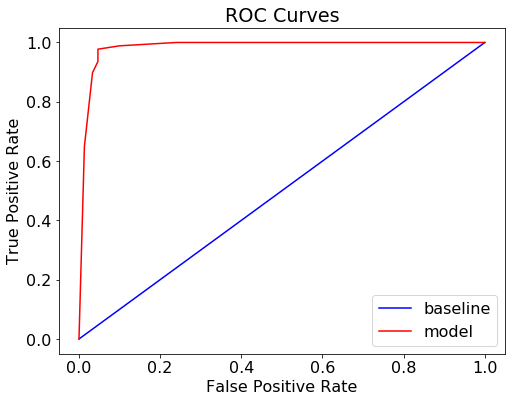

In [18]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)


Confusion matrix, without normalization
[[143   7]
 [  6 259]]


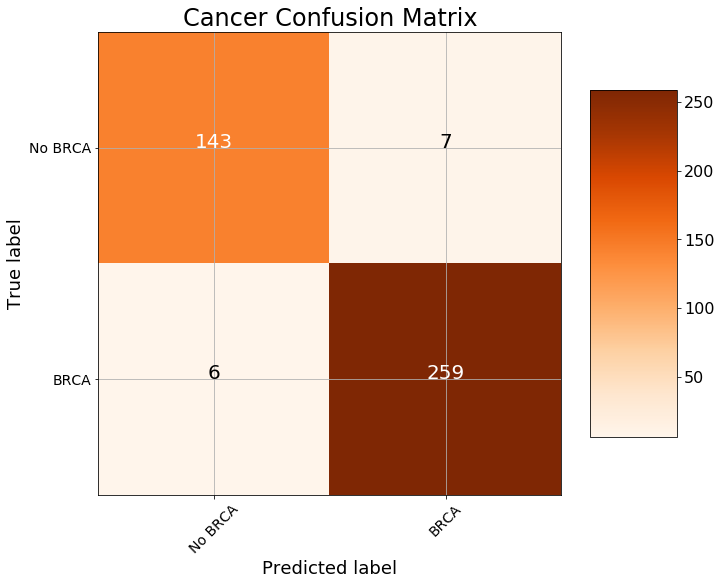

In [19]:
cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm, classes = ['No BRCA', 'BRCA'],
                      title = 'Cancer Confusion Matrix')

In [11]:
features = list(X_traind.columns)
fi_model = pd.DataFrame({'feature': X_traind.columns,
                   'importance': clf.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
0,0,0.820831
7,7,0.107102
4,4,0.049130
10,10,0.022937
668,668,0.000000
667,667,0.000000
666,666,0.000000
665,665,0.000000
664,664,0.000000
663,663,0.000000
